In [46]:
import numpy as np
import pickle
import nibabel as nib
import os

from mbas.data.nifti import make_subject
from mbas.visualize.subject import plot_subject_with_label


from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
preprocessed_folder = "/home/bryan/data/mbas_nnUNet_preprocessed/Dataset104_MBAS/nnUNetResEncUNetMPlans_3d_lowres"

subject_id = "MBAS_001"

npy = np.load(os.path.join(preprocessed_folder, f"{subject_id}.npy"))
npz = np.load(os.path.join(preprocessed_folder, f"{subject_id}.npz"))
with open(os.path.join(preprocessed_folder, f"{subject_id}.pkl"), "rb") as f:
    pkl = pickle.load(f)
seg_npy = np.load(os.path.join(preprocessed_folder, f"{subject_id}_seg.npy"))


subject = make_subject(
    f"/home/bryan/data/MBAS/Training/{subject_id}",
    "train",
)

In [3]:
pkl

{'sitk_stuff': {'spacing': (0.625, 0.625, 2.5),
  'origin': (-190.72938537597656, -180.62953186035156, -26.63135528564453),
  'direction': (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)},
 'spacing': [2.5, 0.625, 0.625],
 'shape_before_cropping': (44, 640, 640),
 'bbox_used_for_cropping': [[0, 44], [1, 639], [1, 639]],
 'shape_after_cropping_and_before_resampling': (44, 638, 638),
 'class_locations': {1: array([[  0,  31, 217, 240],
         [  0,   9, 168, 179],
         [  0,  16, 157, 165],
         ...,
         [  0,  23, 220, 238],
         [  0,  32, 202, 221],
         [  0,  18, 209, 219]])}}

In [13]:
pkl["class_locations"][1].shape

(10000, 4)

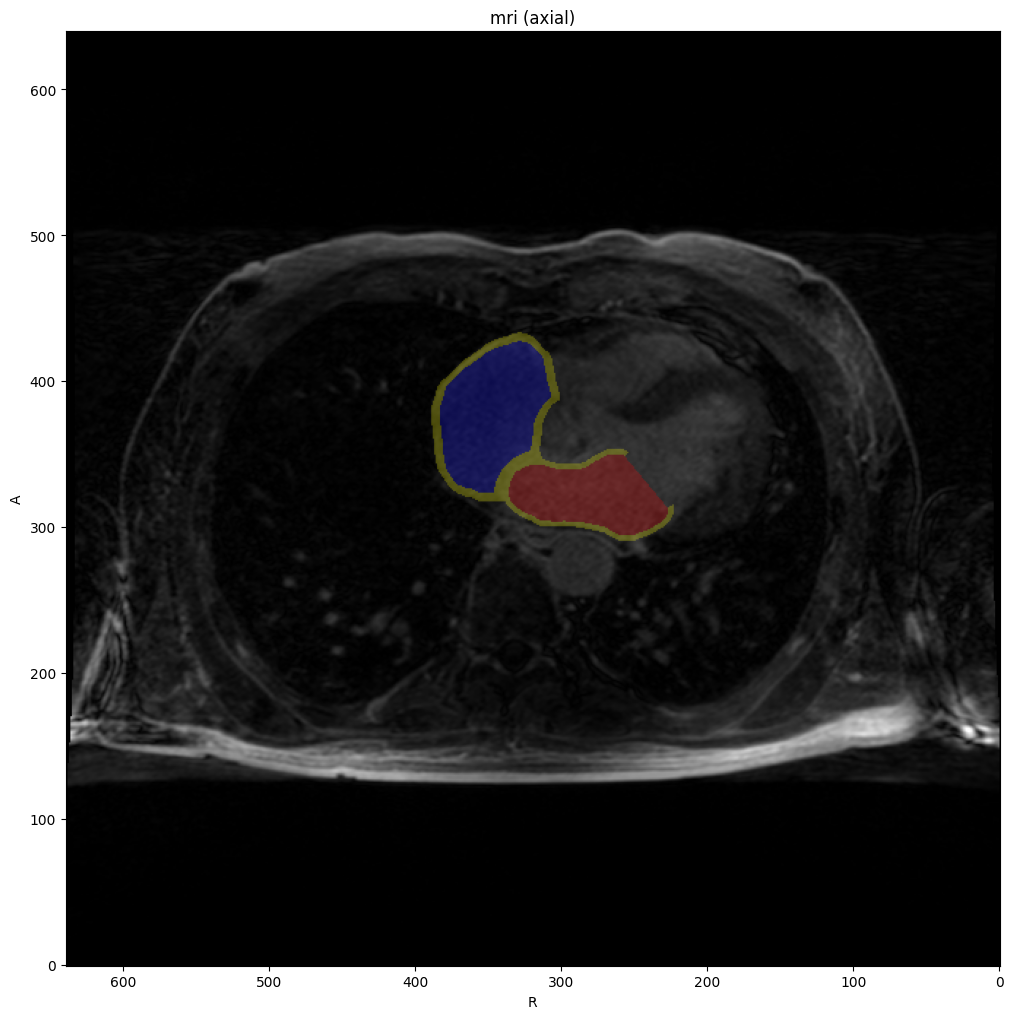

In [32]:
fig = plot_subject_with_label(
    subject,
    show=True,
    add_metadata=False,
    add_segmentation_legend=False,
    single_axis="axial",
    label_key="label",
    cmap="mbas",
    indices = (300, 300, 15),
    figsize=(10,10),
    return_fig = True
);

In [40]:
tuple(subject.mri.shape[1:3])

(640, 640)

In [43]:
def rot90points(x, y, k, hw):
    """
        k: # of 90 degree rotations

        a = np.zeros((5, 12), dtype="uint8");
        x, y = np.array([2, 5, 7]), np.array([4, 4, 2])
        a[y, x] = 200;
        for k in range(10):  # test
            a1 = np.rot90(a, k);
            x1, y1 = rot90points(x, y, k, a.shape);
            assert np.all(a1[y1, x1] == 200)
    """
    k = k % 4
    if k == 0:
        return x, y
    elif k == 1:
        return y, hw[1] - 1 - x
    elif k == 2:
        return hw[1] - 1 - x, hw[0] - 1 - y
    elif k == 3:
        return hw[0] - 1 - y, x
    else:
        raise ValueError(f"k error {k}")


        

def plot_locations(fig, locations, z_index = 15, hw = (640, 640)):
    """
    example location: array([  0,  16, 157, 165])
                                    Z, H, W
        
    the figure dimensions are (640, 640)
    """
    x_values = []
    y_values = []
    for location in locations:
        if location[1] == z_index:
            x_values.append(location[2])
            y_values.append(location[3])
    x_array = np.array(x_values)
    y_array = np.array(y_values)
    
    x_array, y_array = rot90points(x_array, y_array, k=1, hw=hw)
    fig.axes[0].scatter(x_array, y_array, s=2, alpha=1)
    return fig

In [44]:
fig2 = plot_locations(fig, locations, z_index=15, hw= tuple(subject.mri.shape[1:3]))

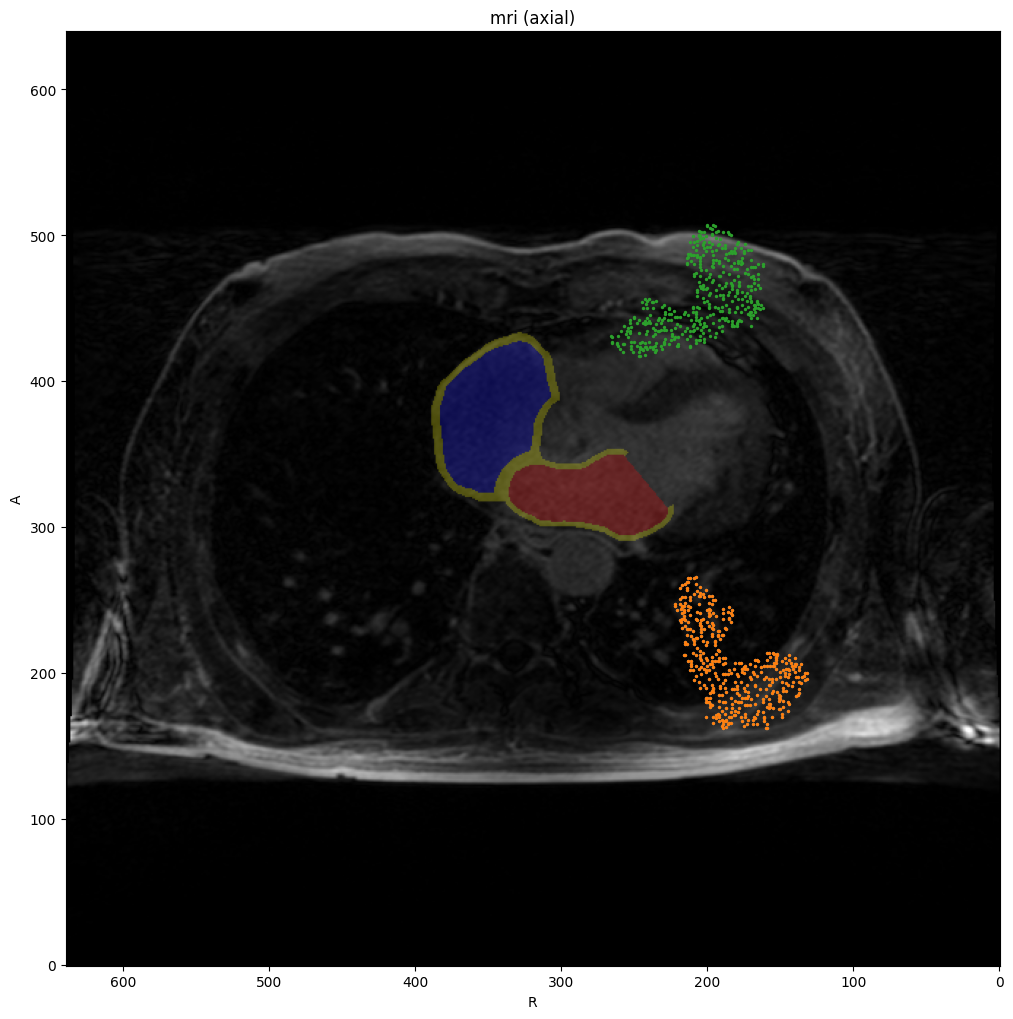

In [45]:
fig2

In [47]:
plt.imshow(subject.mri[0], cmap="gray")

KeyError: 0

In [86]:
def plot_locations_basic(axes, locations, z_index = 15):
    """
    example location: array([  0,  16, 157, 165])
                                    Z, H, W
        
    """
    x_values = []
    y_values = []
    for location in locations:
        if location[1] == z_index:
            y_values.append(location[2])
            x_values.append(location[3])
    x_array = np.array(x_values)
    y_array = np.array(y_values)
    
    print(f"x_array:  min {np.min(x_array)} max {np.max(x_array)}")
    print(f"y_array:  min {np.min(y_array)} max {np.max(y_array)}")

    axes.scatter(x_array, y_array, s=2, alpha=1)

x_array:  min 162 max 266
y_array:  min 132 max 222


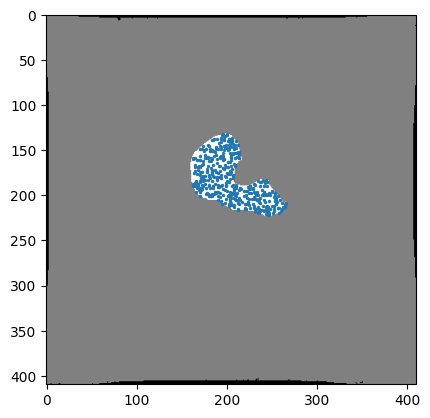

In [87]:
z_index = 15
# array = subject.label.data[0,:,:,z_index].numpy()

# seg_npy.shape, (1, 44, 410, 410)
array = seg_npy[0,z_index]
fig_basic, ax_basic = plt.subplots()
ax_basic.imshow(array, cmap="gray")
plot_locations_basic(ax_basic, locations, z_index = z_index)

In [74]:
pkl

{'sitk_stuff': {'spacing': (0.625, 0.625, 2.5),
  'origin': (-190.72938537597656, -180.62953186035156, -26.63135528564453),
  'direction': (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)},
 'spacing': [2.5, 0.625, 0.625],
 'shape_before_cropping': (44, 640, 640),
 'bbox_used_for_cropping': [[0, 44], [1, 639], [1, 639]],
 'shape_after_cropping_and_before_resampling': (44, 638, 638),
 'class_locations': {1: array([[  0,  31, 217, 240],
         [  0,   9, 168, 179],
         [  0,  16, 157, 165],
         ...,
         [  0,  23, 220, 238],
         [  0,  32, 202, 221],
         [  0,  18, 209, 219]])}}

In [76]:
npy.shape

(1, 44, 410, 410)

In [79]:
seg_npy.shape

(1, 44, 410, 410)

In [80]:
array.shape

(44, 410)